# Pattern Analysis Exercise 01

## Warmup: Sampling from a Closed-Form Distribution

## Exercise 1.1
Implement a function that draws 1000 samples from an univariant gaussian distribution with mean 1 and a standard deviation of 0:2. Plot the experimental distribution using 30 bins. In order to compare it with the ground truth distribution, generate also the plot of such.

#### Univariant Gaussian Distribution
Also called as "Bell Curve" or "Normal Distribution", the general form of equation is as follow:
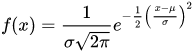


In [2]:
import numpy as np
import matplotlib.pyplot as plt

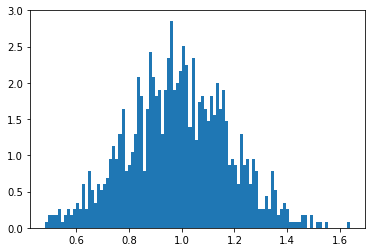

In [3]:
mean, sigma = 1, 0.2

# curve = 1/sigma*sqrt(2*pi) * e(-(sample-mu)^2/sigma^2)
# we want samples first 
np.random.seed(23)
samples = np.random.normal(mean, sigma, 1000)


_, bins, _ = plt.hist(samples, bins=100, density=True)

### Ground Truth

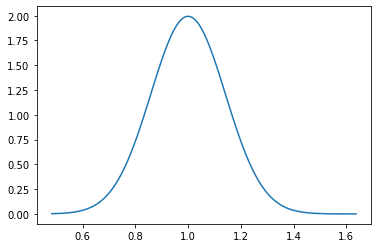

In [4]:
gauss_curve = (1/(sigma*np.sqrt(2*np.pi)))* np.exp((-(bins-mean)**2)/(sigma**2))
#plt.plot(bins)
plt.plot(bins, gauss_curve)
plt.show()

### Combining both

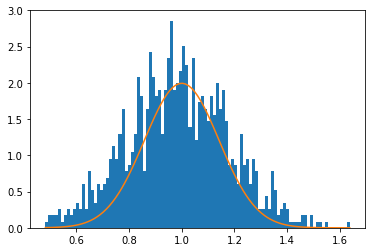

In [5]:
_, bins, _ = plt.hist(samples, bins=100, density=True)
gauss_curve = (1/(sigma*np.sqrt(2*np.pi)))* np.exp((-(bins-mean)**2)/(sigma**2))
#plt.plot(bins)
plt.plot(bins, gauss_curve)
plt.show()

## Exercise 1.2
1. Implement a function that draws 10000 samples from a multivariant gaussian distribution
2. Mean vector = [0.5,-0.2] and covariance matrix = [[2.0, 0.3], [0.3; 0.5]]. 
3. Number of bins =  30 (30x30).

#### Multivariant Gaussian Distribution
The probability density function for Multivariate Gaussian Distribution is

$ f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)$

where $\mu$ is the mean, $\Sigma$ the covariance matrix, and 'k' is the dimension of the space where 'x' takes values.
The covariance matrix 'cov' must be a (symmetric) positive semi-definite matrix.

Refer
1. https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
2. https://matplotlib.org/3.2.0/gallery/mplot3d/hist3d.html

In [26]:
from scipy.stats import multivariate_normal

# Given
mean = [0.5,-0.2]
cov = [[2.0, 0.3], [0.3, 0.5]]
bins = 30
n_samples = 10000

# covariance matrix 'cov' must be a positive semi-definite
np.linalg.eigvals(cov)

array([2.05777472, 0.44222528])

In [27]:
x = np.random.multivariate_normal(mean, cov, 10000)
x.shape

(10000, 2)

In [28]:
H, xedges, yedges = np.histogram2d(x[:,0], x[:,1], bins=(bins,bins))

print(np.max(xedges),np.max(yedges))
print(H.shape, xedges.shape, yedges.shape)

# it means that the whole 2D distribution is approx. from -6 to 6 along x axis and for y axis the distribution is from -3 to 3

5.70545721816926 2.9627007363282285
(30, 30) (31,) (31,)


In [29]:
# define a 3D space
xpos = np.linspace(-6, 6, bins)
ypos = np.linspace(-3, 3, bins)

#X, Y = np.meshgrid(X, Y)   
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])

xpos = xpos.flatten()
ypos = ypos.ravel()
zpos = 0
print(xpos.shape, ypos.shape)

(900,) (900,)


We’ll select the z axis to encode the height of each bar; therefore, each bar will start at z = 0 and have a size that is proportional to the value we are trying to visualise. The x and y positions will represent the coordinates of the bar across the 2D plane of z = 0

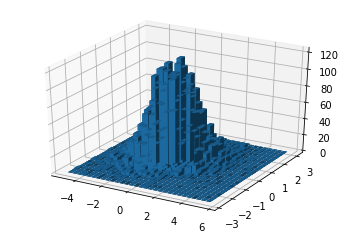

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# size of bar 
x_size = y_size = 0.3
z_size = H.flatten()


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.bar3d(xpos, ypos, zpos, x_size, y_size, z_size, zsort='average')



#### Surface Plots -- Ground Truth Distribution in 2D

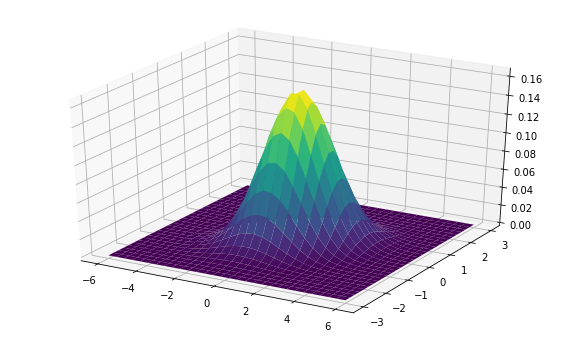

In [51]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
mv_gauss = multivariate_normal(mean, cov)

X = np.linspace(-6,6, bins)
Y = np.linspace(-3,3, bins)


x,y = np.meshgrid(X,Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

z = mv_gauss.pdf(pos)

ax.plot_surface(x, y, z,cmap='viridis',linewidth=0)

array([3.75065960e-05, 1.22609499e-04, 3.69606962e-04, 1.02803864e-03,
       2.64017252e-03, 6.26565280e-03, 1.37543414e-02, 2.79620270e-02,
       5.27202580e-02, 9.23476758e-02, 1.50605304e-01, 2.29272095e-01,
       3.26841175e-01, 4.37992693e-01, 5.54298383e-01, 6.66079539e-01,
       7.64756914e-01, 8.44767390e-01, 9.04354839e-01, 9.45115316e-01,
       9.70724597e-01, 9.85502933e-01, 9.93335770e-01, 9.97148817e-01,
       9.98853633e-01, 9.99553679e-01, 9.99817682e-01, 9.99909116e-01,
       9.99938197e-01, 9.99946691e-01])

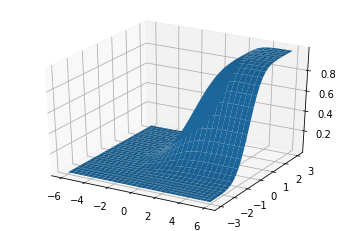

In [69]:
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
z = mv_gauss.cdf(pos)
ax2.plot_surface(x, y, z)
z[:,29]